import the modules and get dataset

In [12]:
import pandas as pd
import numpy as np
import warnings
import cv2
import data
from PIL import Image
import dlib
import data_process
warnings.filterwarnings("ignore")


In [13]:
train_x, train_y, val_x, val_y = data_process.process_data('dataset.csv', "CNN")
train_data = (train_x, train_y)
val_data = (val_x,val_y)

import keras for the model training and layers

In [14]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

create the model with it's layers:

In [15]:
input_shape=(48, 48, 1)
num_classes = 4

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=input_shape))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

the parameters:

import data generator

In [16]:
from keras.preprocessing.image import ImageDataGenerator


compile the model:

In [17]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
batch_size = 32
opt = RMSprop(lr=0.0005, decay=1e-6)

model_1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_1 = model_1.fit_generator(data_generator.flow(train_x, train_y,
                                            batch_size),
                        epochs=100, verbose=1,validation_data =val_data)

Epoch 1/100
12/12 [==============================] - 0s 20ms/step - loss: 1.2863 - accuracy: 0.3828 - val_loss: 1.2523 - val_accuracy: 0.4792
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 1.2175 - accuracy: 0.4661 - val_loss: 1.1514 - val_accuracy: 0.4688
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 1.1737 - accuracy: 0.5078 - val_loss: 1.0554 - val_accuracy: 0.6042
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 1.0444 - accuracy: 0.5651 - val_loss: 0.8491 - val_accuracy: 0.6562
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9380 - accuracy: 0.6589 - val_loss: 0.6655 - val_accuracy: 0.7083
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8489 - accuracy: 0.6719 - val_loss: 0.5768 - val_accuracy: 0.7396
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.7419 - accuracy: 0.6797 - val_loss: 0.5415 - val_accuracy: 0.7083
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.1803 - accuracy: 0.9193 - val_loss: 0.0805 - val_accuracy: 0.9896
Epoch 59/100
12/12 [==============================] - 0s 14ms/step - loss: 0.1551 - accuracy: 0.9453 - val_loss: 0.0955 - val_accuracy: 0.9688
Epoch 60/100
12/12 [==============================] - 0s 13ms/step - loss: 0.2184 - accuracy: 0.9036 - val_loss: 0.0953 - val_accuracy: 0.9688
Epoch 61/100
12/12 [==============================] - 0s 13ms/step - loss: 0.2102 - accuracy: 0.9219 - val_loss: 0.1038 - val_accuracy: 0.9792
Epoch 62/100
12/12 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.9010 - val_loss: 0.0923 - val_accuracy: 0.9896
Epoch 63/100
12/12 [==============================] - 0s 13ms/step - loss: 0.2009 - accuracy: 0.9036 - val_loss: 0.0964 - val_accuracy: 0.9688
Epoch 64/100
12/12 [==============================] - 0s 13ms/step - loss: 0.2131 - accuracy: 0.9115 - val_loss: 0.2125 - val_accuracy: 0.8750
Epoch 65/100

Plot

3/3 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9792


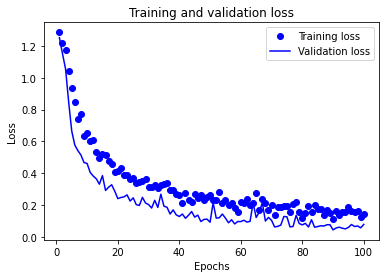

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model_1.evaluate(val_x, val_y, verbose=1)
history_dict=hist_model_1.history
history_dict.keys()

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

do the same with dataset2.csv

In [20]:
train_x2, train_y2, val_x2, val_y2 = data_process.process_data('dataset2.csv', "CNN")
train_data2 = (train_x2, train_y2)
val_data2 = (val_x2,val_y2)


model:

In [21]:
input_shape=(48, 48, 1)
num_classes = 4

model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=input_shape))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (2,2)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

data generator

In [23]:
data_generator2 = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
batch_size = 32
opt2 = RMSprop(lr=0.0005, decay=1e-6)

model_2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_2 = model_2.fit_generator(data_generator2.flow(train_x2, train_y2,
                                            batch_size),
                        epochs=100, verbose=1,validation_data =val_data2)

Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 0.4175 - accuracy: 0.8411 - val_loss: 0.1867 - val_accuracy: 0.9479
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.3286 - accuracy: 0.8568 - val_loss: 0.1122 - val_accuracy: 0.9583
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3322 - accuracy: 0.8516 - val_loss: 0.1181 - val_accuracy: 0.9479
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3021 - accuracy: 0.8984 - val_loss: 0.1417 - val_accuracy: 0.9271
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3078 - accuracy: 0.8646 - val_loss: 0.1165 - val_accuracy: 0.9583
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.2565 - accuracy: 0.8932 - val_loss: 0.1662 - val_accuracy: 0.9062
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.2977 - accuracy: 0.8802 - val_loss: 0.1606 - val_accuracy: 0.9062
Epoch 

12/12 [==============================] - 0s 12ms/step - loss: 0.1153 - accuracy: 0.9531 - val_loss: 0.5684 - val_accuracy: 0.8646
Epoch 59/100
12/12 [==============================] - 0s 13ms/step - loss: 0.1143 - accuracy: 0.9557 - val_loss: 0.3301 - val_accuracy: 0.9062
Epoch 60/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1191 - accuracy: 0.9635 - val_loss: 0.4141 - val_accuracy: 0.8958
Epoch 61/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1730 - accuracy: 0.9297 - val_loss: 0.7498 - val_accuracy: 0.8438
Epoch 62/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1243 - accuracy: 0.9531 - val_loss: 0.9004 - val_accuracy: 0.8021
Epoch 63/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1123 - accuracy: 0.9531 - val_loss: 0.4254 - val_accuracy: 0.8958
Epoch 64/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1431 - accuracy: 0.9375 - val_loss: 0.6162 - val_accuracy: 0.8646
Epoch 65/100

plot

3/3 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9896


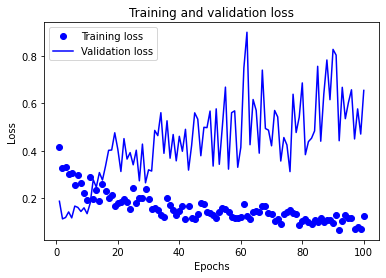

In [24]:
score2 = model_2.evaluate(val_x2, val_y2, verbose=1)
history_dict2=hist_model_2.history
history_dict2.keys()

train_loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(history_dict2['accuracy']) + 1)

plt.plot(epochs2, train_loss_values2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()